In [47]:
!pip install numpy scikit-learn tsplib95 python_tsp k-means-constrained

Defaulting to user installation because normal site-packages is not writeable


In [48]:
import numpy as np
import tsplib95
from python_tsp.distances.tsplib_distance import tsplib_distance_matrix

dataset = "data/pbl395.tsp"

initial_cities = np.atleast_2d(list(tsplib95.load(dataset).node_coords.values()))
distance_matrix = tsplib_distance_matrix(dataset)

In [49]:
def can_stop(CLUSTERS, min_size):
    for c in CLUSTERS:
        if len(c) <= min_size:
            return True
    return False

In [50]:
from algo.get_clusters import get_clusters

CLUSTERS, CENTROIDS = get_clusters(initial_cities, 5)

In [51]:
can_stop(CLUSTERS, 10)

False

In [52]:
from algo.concatenate_all import concatenate_all

result, centroid = concatenate_all(CLUSTERS, CENTROIDS)

In [53]:
from algo.get_clusters import get_clusters
from algo.concatenate_all import concatenate_all
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix
from python_tsp.heuristics.local_search import solve_tsp_local_search

def solve_cluster_tsp(initial_cities, N_CLUSTERS = 8, MIN_SIZE = 50):

    if len(initial_cities) <= N_CLUSTERS * 4:
        distance_matrix = euclidean_distance_matrix(initial_cities)
        permutation, distance = solve_tsp_local_search(distance_matrix)
        # print(distance)
        subset = np.atleast_2d([initial_cities[x] for x in permutation])
        # print(subset)
        return subset, np.mean(initial_cities, axis=0)

    CLUSTERS, CENTROIDS = get_clusters(initial_cities, N_CLUSTERS)
    solved_clusters = []
    for cluster in CLUSTERS:
        solved_clusters.append(solve_cluster_tsp(cluster, N_CLUSTERS - 1, MIN_SIZE)[0])

    return concatenate_all(solved_clusters, CENTROIDS)

In [54]:
result, _ = solve_cluster_tsp(initial_cities)
print(result)

[]
[[ 48  38]
 [ 41  36]
 [ 34  41]
 [ 33  41]
 [ 34  44]
 [ 33  44]
 [ 32  46]
 [ 28  45]
 [ 28  42]
 [ 26  39]
 [ 25  37]
 [ 25  38]
 [ 25  42]
 [ 17  45]
 [  9  49]
 [  2  49]
 [  2  46]
 [  2  45]
 [  0  42]
 [  0  43]
 [  0  44]
 [  0  45]
 [  0  46]
 [  0  47]
 [  0  48]
 [  0  49]
 [  0  50]
 [  0  51]
 [  2  55]
 [  2  58]
 [  2  60]
 [  2  62]
 [  2  67]
 [  2  70]
 [  2  72]
 [  2  74]
 [  2  76]
 [  0  81]
 [  5  84]
 [  5  80]
 [ 11  78]
 [ 15  77]
 [ 12  77]
 [  8  77]
 [  9  70]
 [ 18  67]
 [ 25  70]
 [ 25  69]
 [ 25  68]
 [ 17  63]
 [ 17  64]
 [ 17  65]
 [ 11  67]
 [  2  65]
 [  2  63]
 [  5  59]
 [  9  57]
 [ 10  57]
 [ 11  57]
 [ 12  56]
 [  8  56]
 [  2  53]
 [  2  51]
 [ 15  56]
 [ 18  46]
 [ 25  44]
 [ 28  49]
 [ 32  53]
 [ 34  58]
 [ 33  58]
 [ 28  55]
 [ 25  54]
 [ 25  56]
 [ 25  58]
 [ 28  63]
 [ 28  59]
 [ 32  60]
 [ 33  60]
 [ 34  60]
 [ 35  60]
 [ 38  63]
 [ 40  68]
 [ 41  74]
 [ 41  76]
 [ 41  77]
 [ 40  83]
 [ 38  80]
 [ 34  79]
 [ 28  80]
 [ 25  89]
 [ 25  

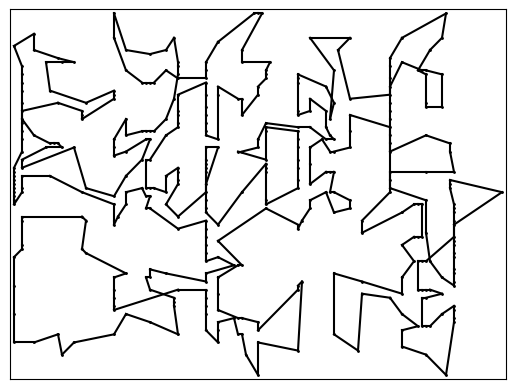

In [55]:
from plotting.plot_path import plot_path

plot_path(result)

In [56]:
from math import dist

cost = 0
for i in range(len(result) - 1):
    cost += dist(result[i], result[i + 1])
cost += dist(result[-1], result[0])
print(cost)

# perm = []

# for x in result:
#     for idx, y in enumerate(initial_cities):
#         if x[0] == y[0] and x[1] == y[1]:
#             perm.append(idx)

# start = perm.index(0)
# perm = perm[start:] + perm[:start]

# distance_matrix = euclidean_distance_matrix(result)

# permutation, distance = solve_tsp_local_search(distance_matrix, x0=perm)

# print(distance)


distance = cost

from data.answers import get_answer

perc = distance / get_answer(dataset) * 100 - 100
rounded = np.round((perc) * 1000)
restored = rounded / 1000

print("Final error: {}%".format(restored))

1709.7477658744046
Final error: 33.47%
